## Table of Contents
- [Importing Libraries](#import)
- [Reading Data](#read)
- [Feature Engineering](#FeatureEngineering)
- [Maching Learning](#machineLearning)

# Importing Libraries <a class='anchor' id = 'import'><a/>

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv


# Reading Data <a class='anchor' id='read'></a>

In [4]:
df = pd.read_csv('/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv');

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.shape

(4446966, 29)

In [5]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [8]:
df['winPlacePerc'].isnull().sum()

1

In [96]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [7]:
df.drop(df.index[2744604], inplace = True)

In [8]:
df['players'] = df.groupby('matchId')['matchId'].transform('count')

In [38]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.000,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.000,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.000,0,0,49.75,2,0,0.1875,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,94
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.0000,0,0.000,0,0,81.70,6,0,0.2935,93
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0.0000,0,2.184,0,0,788.70,4,0,0.4815,98
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,94


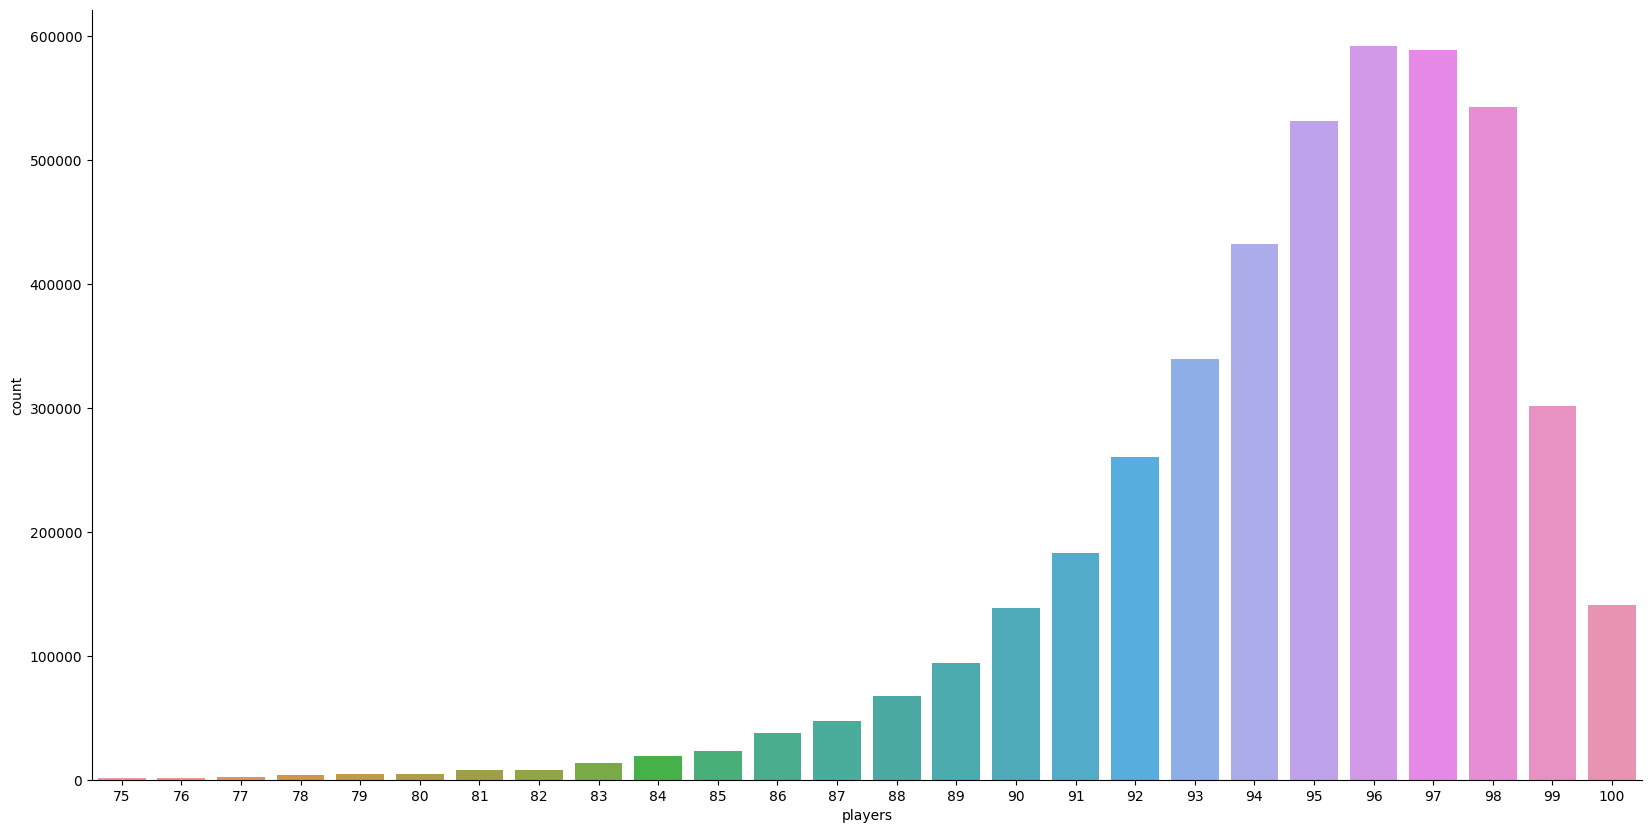

In [57]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'players', data = df[df['players']>=75])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [9]:
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['0movementKills'] = ((df['kills'] > 0) & (df['totalDistance'] == 0))

In [60]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players,totalDistance,0movementKills
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.80,1,1466,0.4444,96,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,0,0,161.80,2,0,0.7755,98,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,0,0,202.70,3,0,0.1667,91,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.00,0,0,49.75,2,0,0.1875,97,49.7500,False


In [10]:
df[df['0movementKills'] == True].shape

(1535, 32)

In [11]:
df.drop(df[df['0movementKills'] == True].index, inplace = True) # deleting the abnormal entries

In [72]:
df.shape

(4445429, 32)

In [149]:
df[df['roadKills'] > 5].shape

(46, 32)

In [12]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

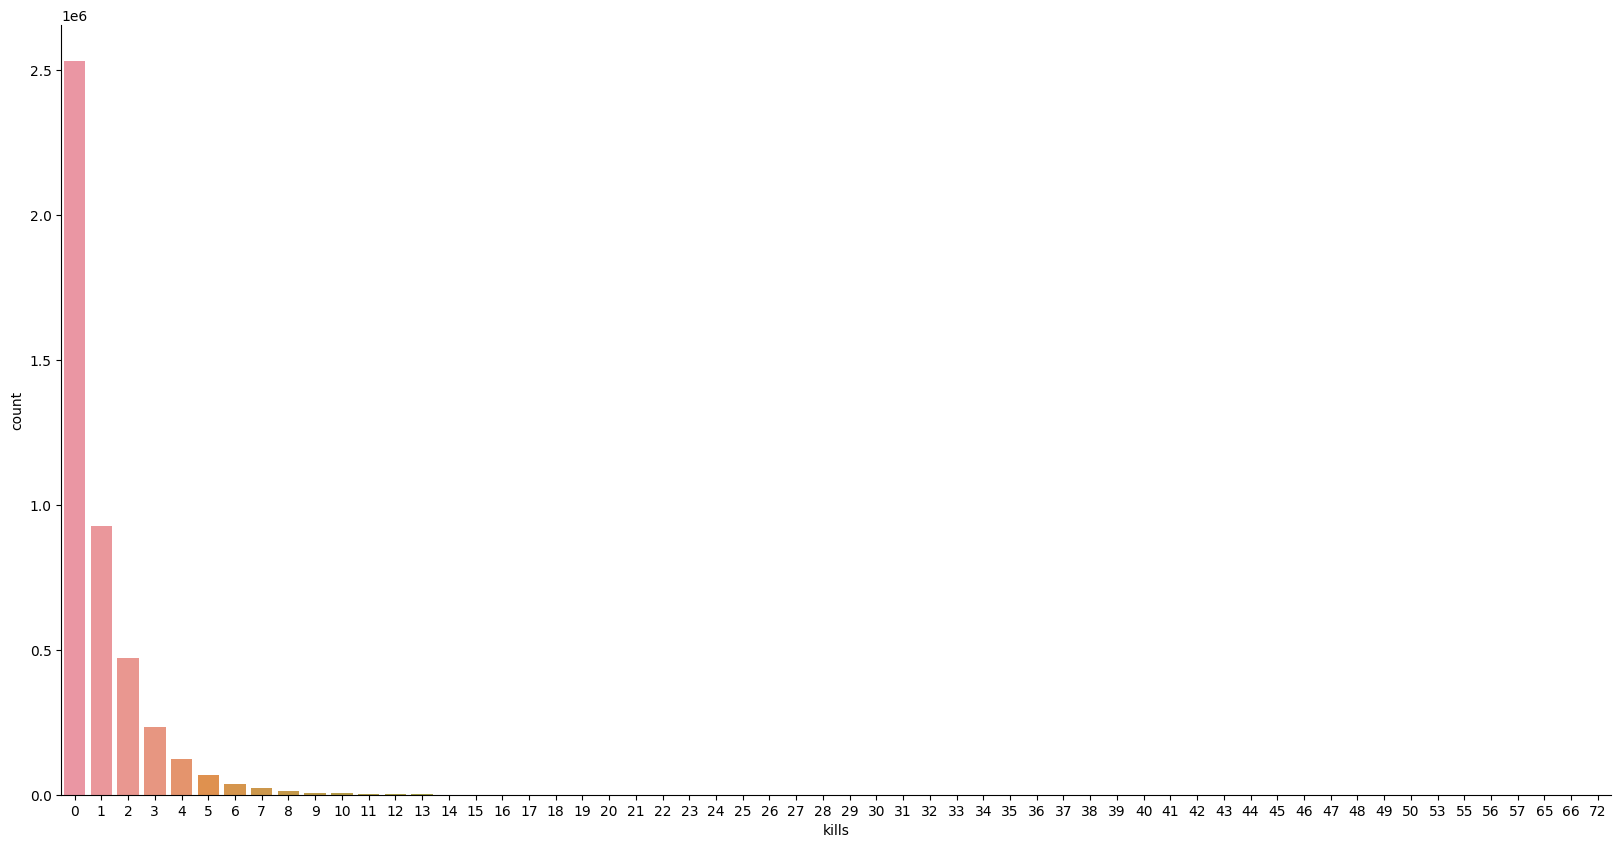

In [80]:
plt.figure(figsize=(20,10))
sns.countplot(x='kills', data = df);
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [104]:
df[df['kills'] > 20].shape

(417, 32)

In [13]:
df.drop(df[df['kills'] > 20].index, inplace = True)

In [14]:
df['headshotRate'] = df['headshotKills']/df['kills']
df['headshotRate'] = df['headshotRate'].fillna(0)
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players,totalDistance,0movementKills,headshotRate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,244.8000,False,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,1445.0445,False,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,161.8000,False,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,202.7000,False,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,49.7500,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,0,1019.00,3,1507,0.1786,94,2311.0000,False,0.0
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0,81.70,6,0,0.2935,93,81.7000,False,0.0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0,788.70,4,0,0.4815,98,790.8840,False,0.0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0,0,2748.00,8,0,0.8000,94,2748.0000,False,0.5


<Axes: ylabel='Density'>

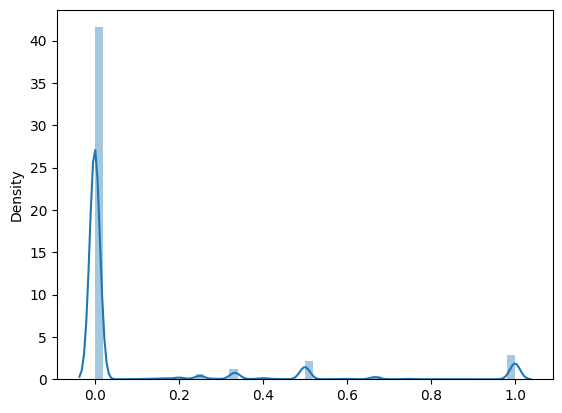

In [109]:
sns.distplot(x = df['headshotRate'])

In [153]:
df[((df['kills'] > 5) & (df['headshotRate'] == 1))].shape

(187, 33)

In [15]:
df.drop(df[(df['headshotRate'] == 1) & (df['kills'] > 6)].index, inplace = True)

In [155]:
df[df['weaponsAcquired']>=20].shape

(2944, 33)

In [16]:
df.drop(df[df['weaponsAcquired']>=20].index, inplace = True)

In [34]:
df.drop(columns = ['Id', 'groupId', 'matchId'], inplace = True)

<Axes: >

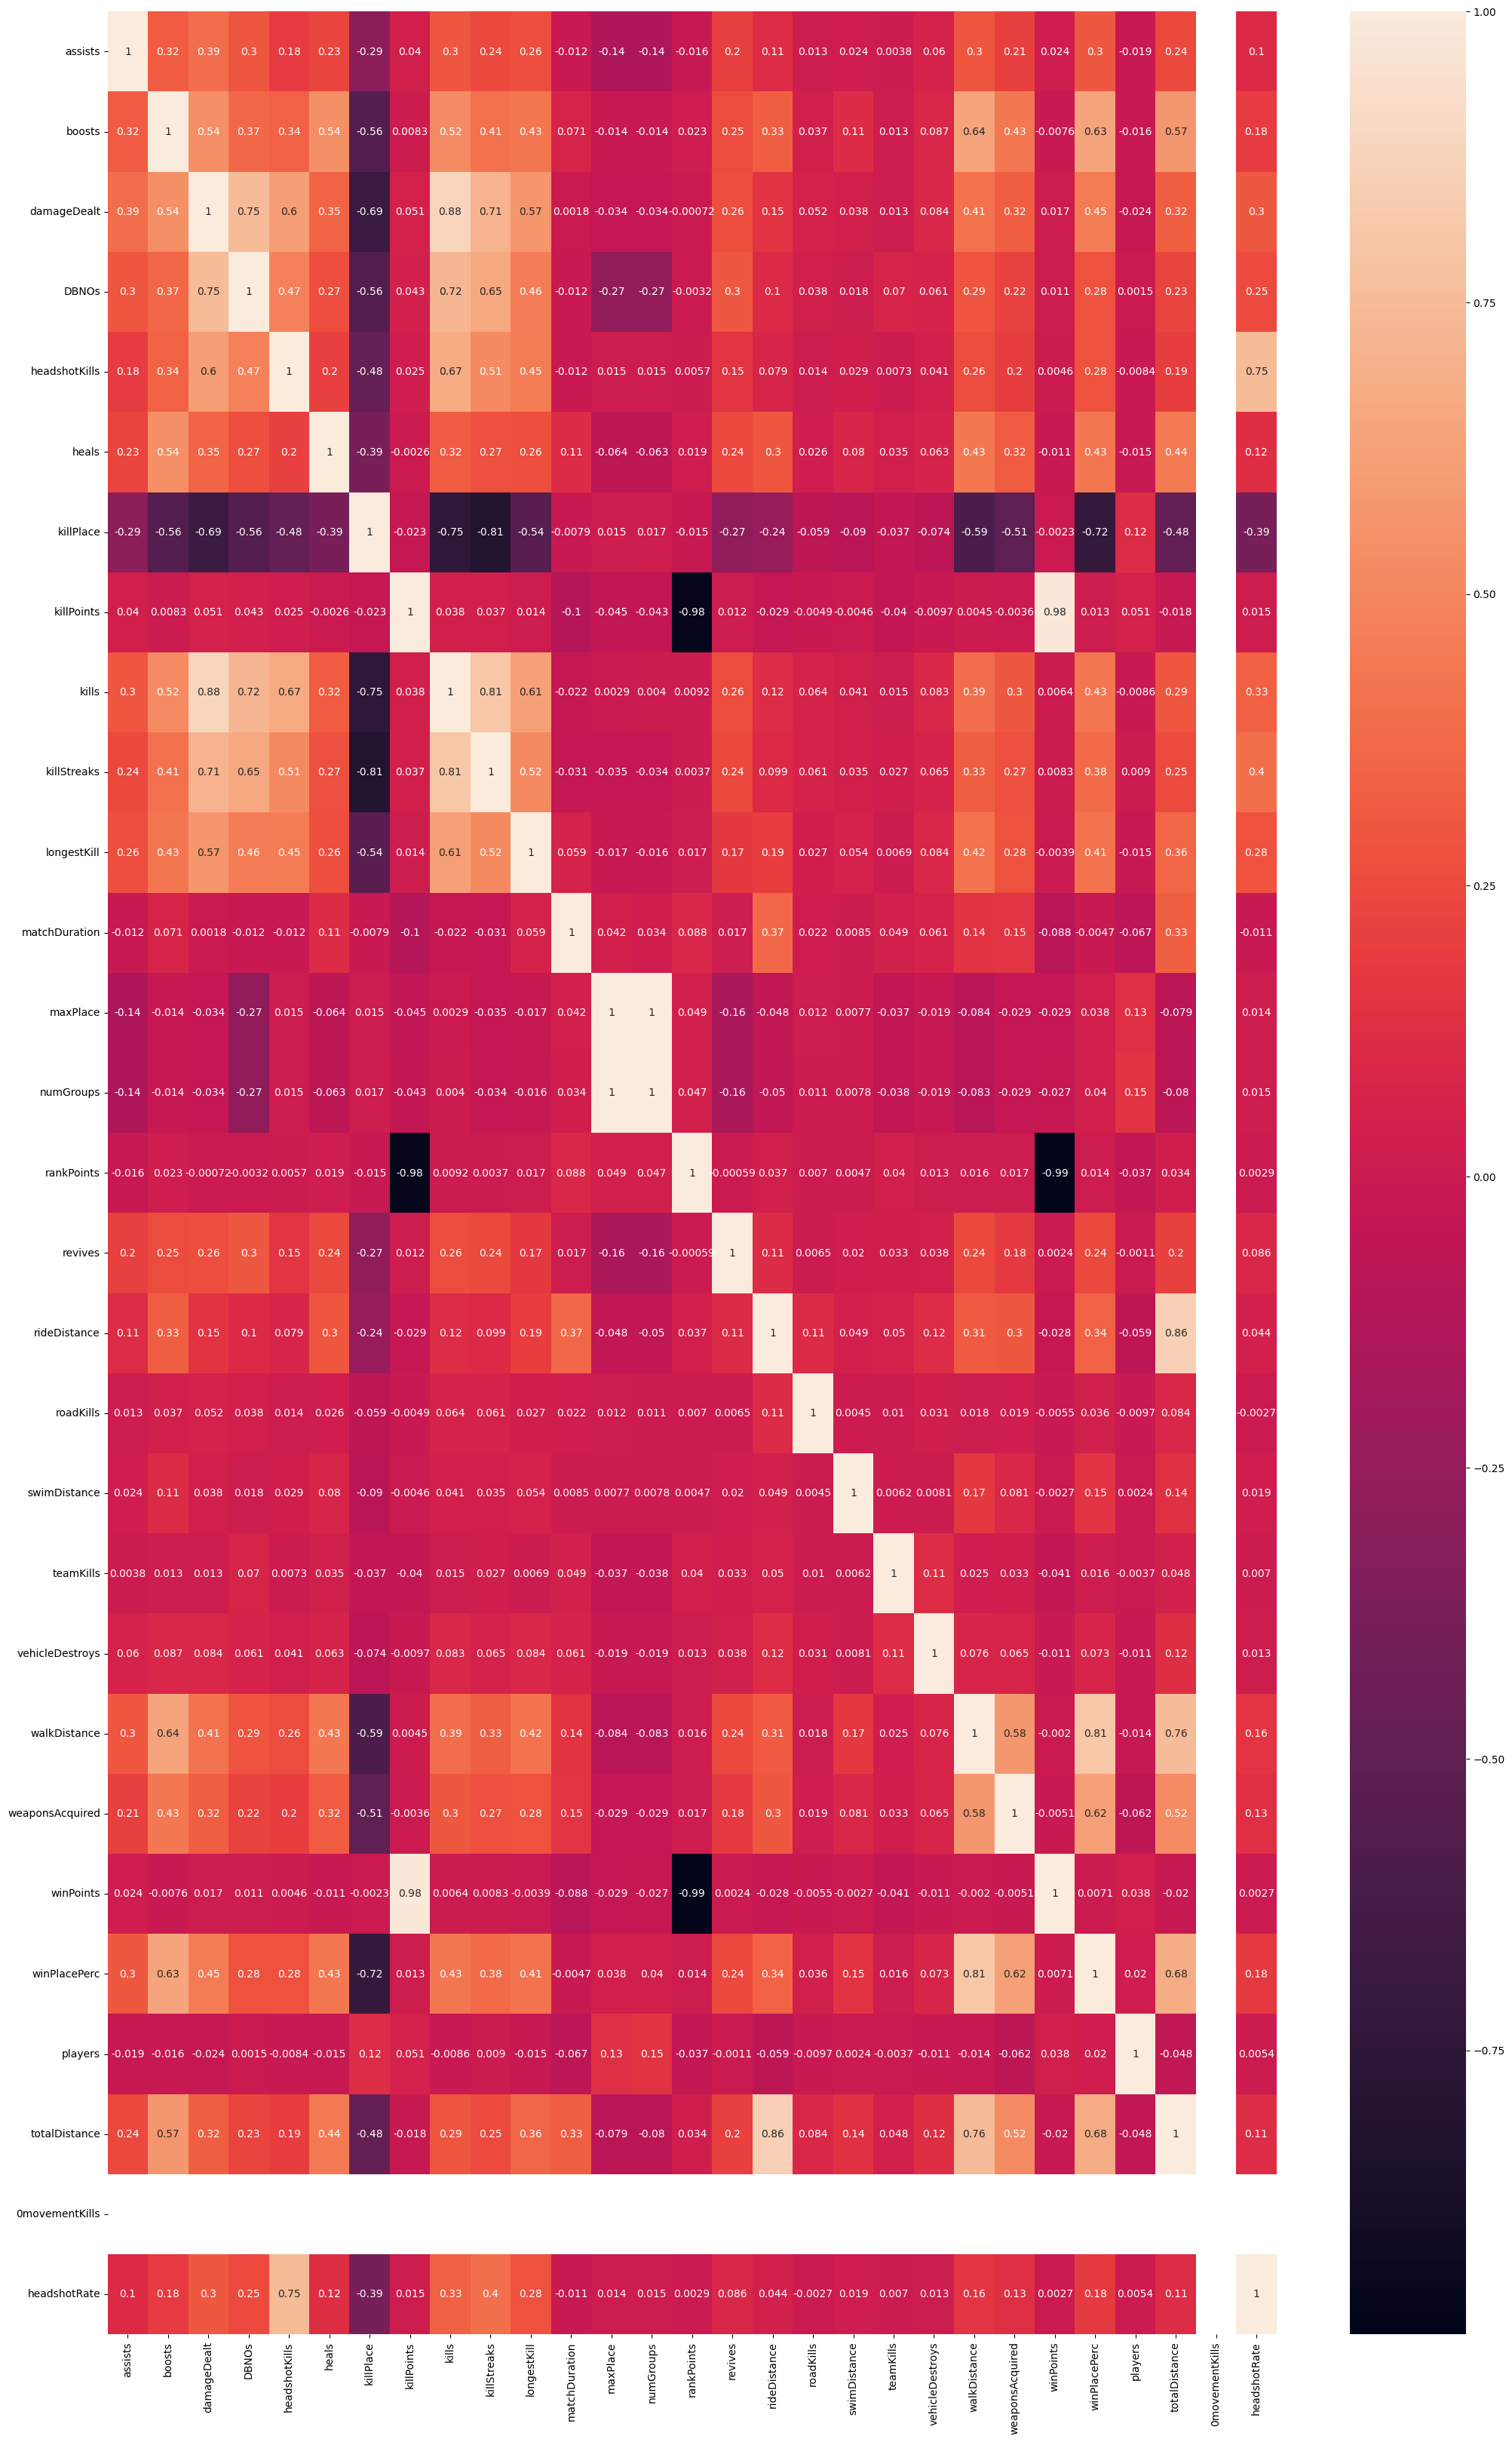

In [132]:
corr = df.corr(numeric_only = True)
plt.figure(figsize=(25, 40))
sns.heatmap(corr, annot=True)

# Feature Engineering <a class='anchor' id='FeatureEngineering'></a>

In [17]:
normalising_factor = ((100 - df['players'])/100) + 1

In [18]:
df['killsNorm'] = df['kills'] * (normalising_factor)
df['damageDealtNorm'] = df['damageDealt']*normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor

df['travelDistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance'];
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [135]:
df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'players', 'totalDistance', '0movementKills',
       'headshotRate', 'killsNorm', 'damageDealtNorm', 'maxPlaceNorm',
       'matchDurationNorm', 'travelDistance', 'healsnboosts', 'assist'],
      dtype='object')

In [39]:
data = df.drop(columns = ['assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [40]:
data

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,0movementKills,headshotRate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,travelDistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,1.03,103.0000,99.91,1466.72,49.7500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,74,1029,0,0.00,squad-fpp,28,-1,0,...,2311.0000,False,0.0,0.00,0.0000,30.74,1985.38,2311.0000,0,0
4446962,0,0,69,0,0,0.00,solo,93,1501,0,...,81.7000,False,0.0,0.00,47.2405,99.51,1535.45,81.7000,1,0
4446963,0,0,66,0,0,0.00,squad-fpp,28,1500,0,...,790.8840,False,0.0,0.00,60.2412,28.56,1347.42,790.8840,0,0
4446964,1,1,11,0,1,98.50,squad-fpp,25,1418,0,...,2748.0000,False,0.5,2.12,191.2240,27.56,1455.38,2748.0000,6,2


# Machine Learning <a id='machineLearning' class='anchor'><a/>

In [41]:
x = data.drop(columns=['winPlacePerc'])
x

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,0movementKills,headshotRate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,travelDistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,1.03,103.0000,99.91,1466.72,49.7500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,74,1029,0,0.00,squad-fpp,28,-1,0,...,2311.0000,False,0.0,0.00,0.0000,30.74,1985.38,2311.0000,0,0
4446962,0,0,69,0,0,0.00,solo,93,1501,0,...,81.7000,False,0.0,0.00,47.2405,99.51,1535.45,81.7000,1,0
4446963,0,0,66,0,0,0.00,squad-fpp,28,1500,0,...,790.8840,False,0.0,0.00,60.2412,28.56,1347.42,790.8840,0,0
4446964,1,1,11,0,1,98.50,squad-fpp,25,1418,0,...,2748.0000,False,0.5,2.12,191.2240,27.56,1455.38,2748.0000,6,2


In [44]:
y = data['winPlacePerc']
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4441916, dtype: float64

In [43]:
# one hot encoding

x = pd.get_dummies(x, columns = ['matchType', '0movementKills'])

x

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,0movementKills_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,74,1029,0,0.00,28,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
4446962,0,0,69,0,0,0.00,93,1501,0,0,...,False,False,False,False,False,True,False,False,False,True
4446963,0,0,66,0,0,0.00,28,1500,0,0,...,False,False,False,False,False,False,False,False,True,True
4446964,1,1,11,0,1,98.50,25,1418,0,0,...,False,False,False,False,False,False,False,False,True,True


In [45]:
features = x.columns
features

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'players',
       'totalDistance', 'headshotRate', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'travelDistance', 'healsnboosts',
       'assist', 'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', '0movementKills_False'],
      dtype='object')

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(x);
x = pd.DataFrame(x_scaler)
x

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.580527,-0.382513,0.450475,1.172595,-0.765457,-0.451168,-0.732073,-1.212354,-0.049636,-0.142593,...,-0.033911,-0.006259,-0.014595,-0.00899,-0.056881,-0.206587,-0.370669,-0.405183,1.236725,0.0
1,-0.580527,-0.382513,0.341213,-0.804741,-0.765457,-0.451168,-0.775038,0.803570,-0.049636,-0.142593,...,-0.033911,-0.006259,-0.014595,-0.00899,-0.056881,-0.206587,-0.370669,-0.405183,1.236725,0.0
2,-0.580527,-0.382513,-0.022994,-0.804741,-0.765457,-0.451168,0.170183,0.813073,-0.049636,-0.142593,...,-0.033911,-0.006259,-0.014595,-0.00899,-0.056881,-0.206587,-0.370669,-0.405183,-0.808587,0.0
3,-0.580527,-0.382513,0.996784,-0.804741,-0.765457,-0.451168,-0.560215,0.700399,-0.049636,-0.142593,...,-0.033911,-0.006259,-0.014595,-0.00899,-0.056881,-0.206587,-0.370669,-0.405183,1.236725,0.0
4,-0.580527,-0.382513,-0.095835,-0.804741,0.645633,0.700660,2.232484,0.906742,-0.049636,-0.142593,...,-0.033911,-0.006259,-0.014595,-0.00899,-0.056881,-0.206587,2.697822,-0.405183,-0.808587,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441911,-0.580527,-0.382513,0.960364,0.834807,-0.765457,-0.451168,-0.646144,-1.212354,-0.049636,-0.142593,...,-0.033911,-0.006259,-0.014595,-0.00899,-0.056881,-0.206587,-0.370669,-0.405183,1.236725,0.0
4441912,-0.580527,-0.382513,0.778260,-0.804741,-0.765457,-0.451168,2.146555,0.826648,-0.049636,-0.142593,...,-0.033911,-0.006259,-0.014595,-0.00899,-0.056881,4.840568,-0.370669,-0.405183,-0.808587,0.0
4441913,-0.580527,-0.382513,0.668998,-0.804741,-0.765457,-0.451168,-0.646144,0.825291,-0.049636,-0.142593,...,-0.033911,-0.006259,-0.014595,-0.00899,-0.056881,-0.206587,-0.370669,-0.405183,1.236725,0.0
4441914,0.305113,1.322613,-1.334137,-0.804741,0.645633,1.487241,-0.775038,0.713974,-0.049636,-0.142593,...,-0.033911,-0.006259,-0.014595,-0.00899,-0.056881,-0.206587,-0.370669,-0.405183,1.236725,0.0


In [47]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.25, random_state = 0)

In [50]:
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

train_dataset = cb.Pool(x_train, y_train)
test_dataset = cb.Pool(x_test, y_test)

model = cb.CatBoostRegressor(loss_function = 'RMSE')

In [51]:
# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5483565	test: 0.5478620	best: 0.5478620 (0)	total: 161ms	remaining: 15.9s
1:	learn: 0.5334751	test: 0.5329894	best: 0.5329894 (1)	total: 251ms	remaining: 12.3s
2:	learn: 0.5190845	test: 0.5186047	best: 0.5186047 (2)	total: 335ms	remaining: 10.8s
3:	learn: 0.5051770	test: 0.5047021	best: 0.5047021 (3)	total: 424ms	remaining: 10.2s
4:	learn: 0.4917209	test: 0.4912519	best: 0.4912519 (4)	total: 503ms	remaining: 9.55s
5:	learn: 0.4786972	test: 0.4782344	best: 0.4782344 (5)	total: 584ms	remaining: 9.14s
6:	learn: 0.4660813	test: 0.4656278	best: 0.4656278 (6)	total: 664ms	remaining: 8.82s
7:	learn: 0.4539047	test: 0.4534568	best: 0.4534568 (7)	total: 741ms	remaining: 8.52s
8:	learn: 0.4420944	test: 0.4416537	best: 0.4416537 (8)	total: 817ms	remaining: 8.27s
9:	learn: 0.4307025	test: 0.4302693	best: 0.4302693 (9)	total: 907ms	remaining: 8.16s
10:	learn: 0.4197038	test: 0.4192711	best: 0.4192711 (10)	total: 987ms	remaining: 7.98s
11:	learn: 0.4090618	test: 0.4086350	best: 0.4086350

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [53]:
pred = model.predict(x_test)

In [56]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93
